## Логические методы классификации


### Цель работы

изучение принципов построения информационных систем с использованием логических методов классификации.

### Задачи 

 - освоение технологии внедрения алгоритмов на онове решающих списков в приложения;
 - освоение технологии внедрения алгоритмов на онове решающих деревьев в приложения;
 - изучение параметров логической классификации;
 - освоение модификаций логических методов классификации.

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import random



from matplotlib import pyplot as plt
%matplotlib inline

In [53]:
data_source = "music/Music-genre.csv"
data = pd.read_csv(data_source, delimiter=',')
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


#### В наборе данных music_genre представлены следующие признаки (в целях упрощения задачи классификации возьмем во внимание только некоторые признаки)
- танцевальность
- энергия
- инструментальность
- эмоциональное содержание 

In [63]:
data_source = "music/Music-genre.csv"
data = pd.read_csv(data_source, delimiter=',')
selected_columns = ['danceability', 'energy', 'instrumentalness', 'music_genre']
data_1 = data[selected_columns]
print(data_1['music_genre'].unique())


random_indices = np.random.choice(data_1.index, size=1000, replace=False)
data_2 = data_1.iloc[random_indices]
data_2.to_csv("random_data.csv", index=False)
data_3 = pd.read_csv("random_data.csv", delimiter=',')
# data_3.dropna(inplace=True)
data_3 = data_3[(data_3.music_genre == "Classical") | 
               (data_3.music_genre == "Rap") |
               (data_3.music_genre == "Rock")]
data_3.dropna(inplace=True)
print(data_3.head())

['Electronic' nan 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues' 'Rock'
 'Classical' 'Hip-Hop']
    danceability  energy  instrumentalness music_genre
1          0.157  0.0553          0.800000   Classical
5          0.600  0.7670          0.000000         Rap
7          0.650  0.4490          0.000019        Rock
8          0.697  0.4410          0.000001         Rap
13         0.774  0.6430          0.000000         Rap


In [64]:
X = data_3[['danceability', 'energy', 'instrumentalness']]
y = data_3['music_genre']

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Подмножества для hold-out
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=12)

# Обучение модели
tree = DecisionTreeClassifier(max_depth=5, 
                              random_state=21, 
                              max_features=2)
tree.fit(X_train, y_train)

# Получение оценки hold-out
tree_pred = tree.predict(X_holdout)
accur = accuracy_score(y_holdout, tree_pred)
print(accur)

0.7529411764705882


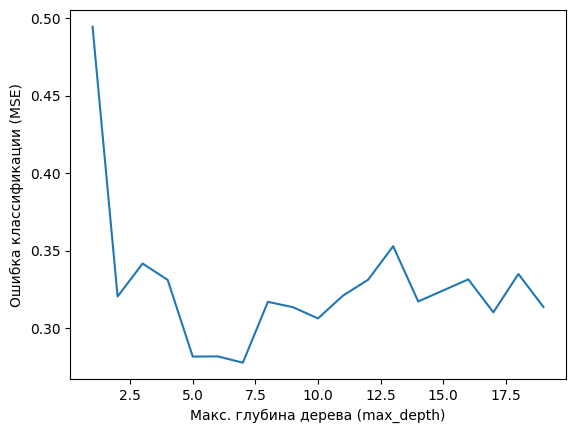

Оптимальные значения max_depth:  [7]


In [66]:
from sklearn.model_selection import cross_val_score

# Значения параметра max_depth
d_list = list(range(1,20))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for d in d_list:
    tree = DecisionTreeClassifier(max_depth=d, 
                                  random_state=21, 
                                  max_features=2)
    scores = cross_val_score(tree, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(d_list, MSE)
plt.xlabel('Макс. глубина дерева (max_depth)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
d_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_d_min = []
for i in range(len(MSE)):
    if MSE[i] <= d_min:
        all_d_min.append(d_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения max_depth: ', all_d_min)

In [67]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import tree

dtc = DecisionTreeClassifier(max_depth=10, random_state=21, max_features=2)

tree_params = { 'max_depth': range(1,20), 'max_features': range(1,4) }
tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=-1)
tree_grid.fit(X, y)

print('\n')
print('Лучшее сочетание параметров: ', tree_grid.best_params_)
print('Лучшие баллы cross validation: ', tree_grid.best_score_)

Fitting 10 folds for each of 57 candidates, totalling 570 fits


Лучшее сочетание параметров:  {'max_depth': 4, 'max_features': 1}
Лучшие баллы cross validation:  0.7577586206896552


In [68]:
from sklearn.tree import export_graphviz
# Генерируем графическое представление дерева
tree.export_graphviz(tree_grid.best_estimator_, 
                     feature_names=X.columns,
                     class_names=y.unique(),
                     out_file='./img/music_tree.dot',  
                     filled=True, rounded=True);

#### Отрисовка

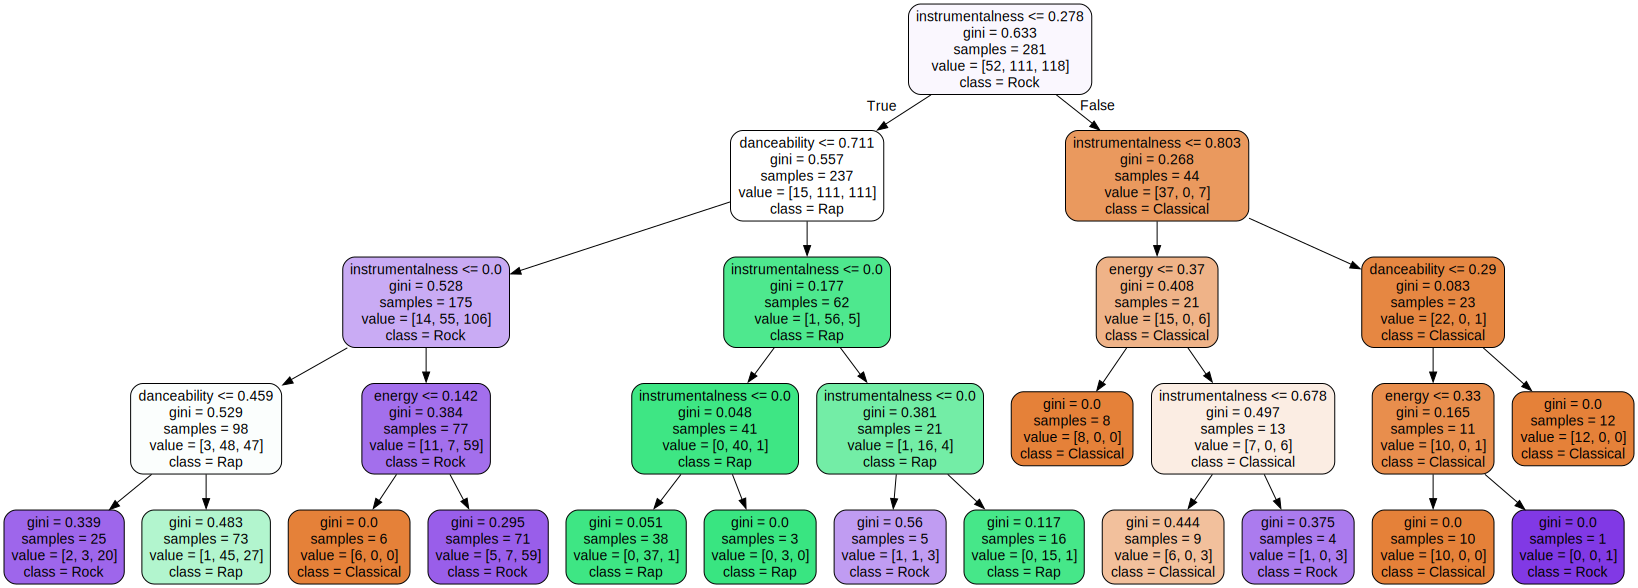

In [69]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
import graphviz
with open('./img/music_tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

C:\Users\Саша\AppData\Local\Temp\ipykernel_10116\2820843707.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
C:\Users\Саша\AppData\Local\Temp\ipykernel_10116\2820843707.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(fmin[j], fmax[j], plot_step))
C:\Users\Саша\AppData\Local\Temp\ipykernel_10116\2820843707.py:23: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  p[p==answers[0]] = 0
C:\Users\Саша\AppData\Local\Temp\ipykernel_10116\2820843707.py:24: FutureWarning:

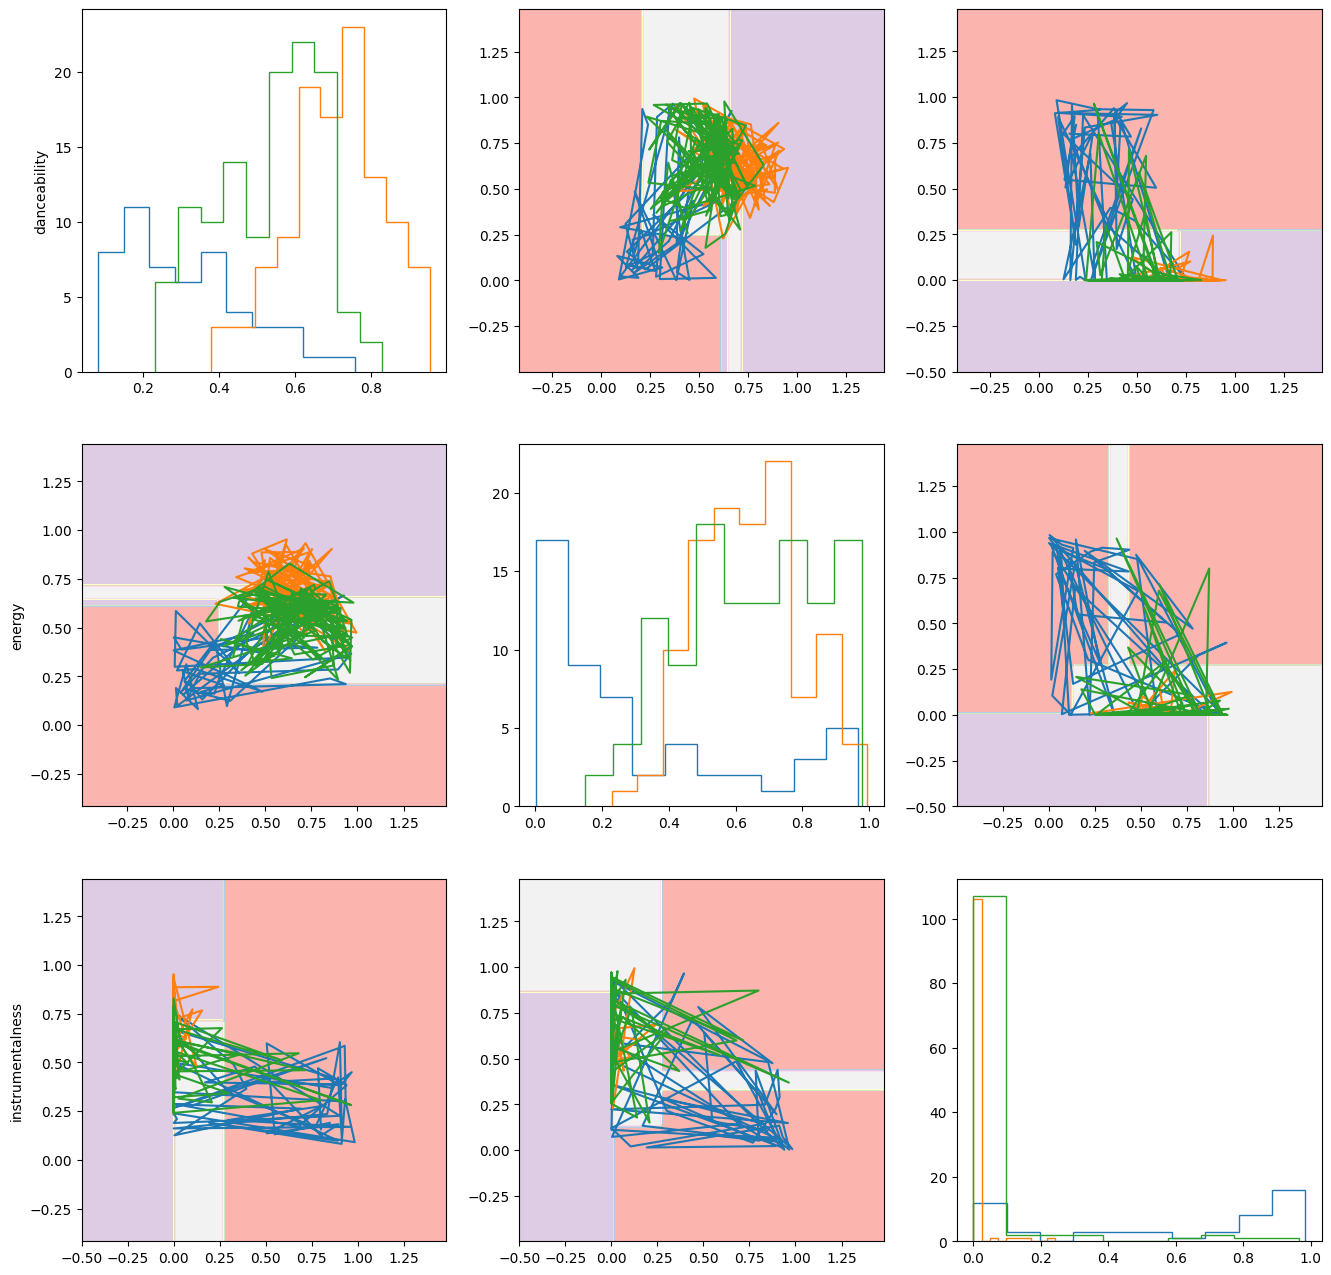

In [74]:
answers = y.unique()
dy = data_3['music_genre'].replace({'Classical': 0, 'Rap': 1, 'Rock': 2})
# dy = data_3['music_genre'].replace({'Electronic': 0, 'Jazz': 1, 'Alternative': 2, 'Country': 3, 'Rap': 4, 'Blues': 5, 'Rock': 6, 'Classical': 7, 'Hip-Hop': 8})
# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(3, 3, figsize=(16,16))

fmin = X.min()-0.5
fmax = X.max()+0.5
plot_step = 0.02  

# Обходим все subplot
for i in range(0,3):
    for j in range(0,3):

        # Строим решающие границы 
        if(i != j):
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                               np.arange(fmin[j], fmax[j], plot_step))
            model = DecisionTreeClassifier(max_depth=3, random_state=21, max_features=2)
            model.fit(X.iloc[:, [i,j]].values, dy)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)
            p[p==answers[0]] = 0
            p[p==answers[1]] = 1
            p[p==answers[2]] = 2
            xx = xx.astype(np.float32)
            yy = yy.astype(np.float32)
            p = p.astype(np.float32)
            places[i,j].contourf(xx, yy, p, cmap='Pastel1') 
      
        # Обход всех классов
        for id_answer in range(len(answers)):
            idx = np.where(y == answers[id_answer])
            if i==j:
                places[i, j].hist(X.iloc[idx].iloc[:,i],
                                  # color=plot_markers[id_answer][0],
                                 histtype = 'step')
            else:
                places[i, j].plot(X.iloc[idx].iloc[:,i], X.iloc[idx].iloc[:,j], 
                                  # plot_markers[id_answer], 
                                  label=answers[id_answer], markersize=6)
        
        if j==0:
            places[i, j].set_ylabel(X.columns[i])
        
        if i==3:
            places[i, j].set_xlabel(X.columns[j])


In [77]:
# Построим модель для оптимального дерева
# max_features = 1 (максимального количества признаков), max_depth = 4 (максимальной глубины)

dtc = DecisionTreeClassifier(max_depth=4, 
                             random_state=21, 
                             max_features=1)
dtc.fit(X.values, y.values)


# Использование классификатора
# Объявление признаков объекта 'danceability', 'energy', 'instrumentalness'

danceability = float(input('Введите меру танцевальности: '))
energy = float(input('Введите меру энергичности: '))
instrumentalness = float(input('Введите инструментальность: '))
X_new = np.array([[danceability, energy, instrumentalness]])

# Получение ответа для нового объекта
target = dtc.predict(X_new)[0]


print('\nМелодия соответвсвует жанру ',target)


Введите меру танцевальности:  0.09
Введите меру энергичности:  0.8
Введите инструментальность:  0.02



Мелодия соответвсвует жанру  Rock
